# Python example "RepeatsPipeline":

## inputs: 
### - PF0023_weights_py_input.txt 
- the output of the R code that has the unchanged sequence names/regions and repeat weights

### - PF0023_2reps_py_input.txt 
- the output of the R code that has the 64 residue sequences and unchanged sequence names/regions

## outputs:
### - PF00023_newname_weights.txt 
- has plm.c readable sequence names and repeat weights

### - PF00023_weights_plm_input.txt 
- just the repeat weights without the readable sequence names. 
- <span style="color:red">weights input to the C code</span>.
- I confirmed that it does not matter to use this method because the order is the same in the weights_newnames.txt and the input msa to plm.c

### - PF00023_2reps_plm_input.txt 
- <span style="color:red">MSA input to the plm.c</span> 
- has 64 residues and 91143 sequences

###  - PF00023_submit.sh
- runs plm.c 

In [1]:
# importing packages
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def scale_01(a):
    print(np.ptp(a))
    return (a - np.min(a))/np.ptp(a)

In [3]:
directory = os.getcwd().split('pyCode')[0]
print(directory)

/Users/adashaw/Dropbox (Harvard University)/Debbie-Ada/repeatsProject/


In [4]:
# PARAMETERS: pfam
pfam = "PF00023"
try:
    os.mkdir(directory+pfam+'/pyOutput/')
    os.mkdir(directory+pfam+'/cOutput/')
except: 
    print('directory already exists')

directory already exists


## repeat weights (option -rw)

In [5]:
# INPUT: PF0023_weights_py_input.txt
df_repweights = pd.read_csv(directory+pfam+'/rOutput/'+pfam+'_weights_py_input.txt',header=None,delimiter='\s',names=['names','weights'])
df_repweights['names']=df_repweights['names'].str.replace('"','')
df_repweights['sequence_id'] = df_repweights['names'].str.split(r"/[\d']",n=1,expand=True)[0]
tmp = 'whatever'
tmp2 = np.zeros_like(df_repweights.weights.values,dtype=int)
print('number of sequences: {}'.format(len(tmp2)))
num = 0
for (index,row) in df_repweights.iterrows():
        if row.sequence_id != tmp:
            num = 0
            tmp = row.sequence_id
        num += 1
        tmp2[index] = num
df_repweights['repeat_num'] = tmp2
df_repweights['new_names'] = df_repweights['sequence_id'].map(str) +'_'+ df_repweights['repeat_num'].map(str)+'/1-64'
name_dict=dict(zip(df_repweights.names.values,df_repweights.new_names.values))

## OUTPUT: PF00023_newname_weights.txt
df_repweights[['new_names','weights']].to_csv(directory+pfam+'/pyOutput/'+pfam+'_newname_weights.txt',header=None,index=False)

## OUTPUT: PF00023_weights_plm_input.txt
df_repweights['weights'] = scale_01(df_repweights.weights.values)
df_repweights[['weights']].to_csv(directory+pfam+'/pyOutput/'+pfam+'_weights_plm_input.txt',header=None,index=False)

## INPUT: PF0023_2reps_py_input.txt
msa_file = directory+pfam+'/rOutput/'+pfam+'_2reps_py_input.txt'
with open(msa_file,'r') as file:
    all_lines=file.readlines()
for (index,lines) in enumerate(all_lines):
    if lines.startswith('>'):
        all_lines[index] = all_lines[index].replace(all_lines[index][1:-1],name_dict[all_lines[index][1:-1]])

## OUTPUT: PF00023_2reps_plm_input.txt
with open(directory+pfam+'/pyOutput/'+pfam+'_2reps_plm_input.txt','w') as file:
    file.writelines(all_lines)

/Users/adashaw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


number of sequences: 183317


TypeError: '>=' not supported between instances of 'str' and 'NoneType'

## henikoff*repeats weights (option -hw)

/Users/adashaw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


number of sequences: 91058
0.09882891108551686
1.0


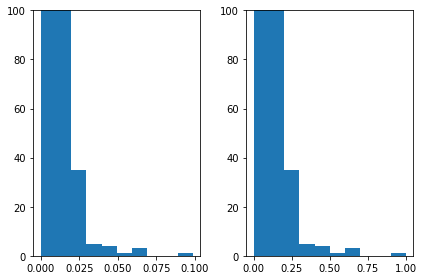

In [63]:
# INPUT: PF0023_weights_py_input.txt
df_henirepweights = pd.read_csv(directory+pfam+'/rOutput/'+pfam+'_heniweights_py_input.txt',header=None,delimiter='\s',names=['names','weights'])
df_henirepweights['names']=df_henirepweights['names'].str.replace('"','')
df_henirepweights['sequence_id'] = df_henirepweights['names'].str.split(r"/[\d']",n=1,expand=True)[0]
tmp = 'whatever'
tmp2 = np.zeros_like(df_henirepweights.weights.values,dtype=int)
print('number of sequences: {}'.format(len(tmp2)))
num = 0
plt.subplot(1,2,1)
plt.hist(df_henirepweights.weights.values)
plt.ylim([0,100])
df_henirepweights['weights'] = scale_01(df_henirepweights.weights.values)
plt.subplot(1,2,2)
plt.hist(df_henirepweights.weights.values)
plt.ylim([0,100])
plt.tight_layout()
for (index,row) in df_henirepweights.iterrows():
        if row.sequence_id != tmp:
            num = 0
            tmp = row.sequence_id
        num += 1
        tmp2[index] = num
df_henirepweights['repeat_num'] = tmp2
df_henirepweights['new_names'] = df_henirepweights['sequence_id'].map(str) +'_'+ df_henirepweights['repeat_num'].map(str)+'/1-64'
name_dict=dict(zip(df_henirepweights.names.values,df_henirepweights.new_names.values))

## OUTPUT: PF00023_heniweights_plm_input.txt
df_henirepweights[['weights']].to_csv(directory+pfam+'/pyOutput/'+pfam+'_heniweights_plm_input.txt',header=None,index=False)


## <span style = "color:gray" >just confirming code works - not part of "pipeline" </span>

In [ ]:
# make sure the order of the msa matches the orders of the weights
orderPreserved= True
for (index,line) in enumerate(all_lines):
    if (index%2==0):
        if (line[1:-1]!=df_repweights.new_names.values[int(index/2)]):
            orderPreserved=False
            print(line[1:],df_repweights.new_names.values[int(index/2)])
if orderPreserved:
    print('success you idiot')

In [62]:
# set all repeat weights to 1 to see if the fast convergence still occurs
df_oneweights = df_henirepweights.copy()
df_oneweights['weights'] = np.ones_like(df_henirepweights.weights.values)
df_oneweights['weights'].to_csv(directory+pfam+'/pyOutput/'+pfam+'_ones_plm_input.txt',header=None,index=False)


In [ ]:
# confirm that same sequence id values are all clustered together should get an array with only 1

np.unique(df_repweights[['sequence_id','repeat_num']].pivot_table(index=['sequence_id','repeat_num'],aggfunc='size').values)